In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# # Loading -  "MNIST Data Set"

### Containing Training samples - 60,000; Testing samples - 10,000

#### TensorFlow already contain MNIST dataset which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist

### After loading the MNIST dataset, Divide into train and test datasets

In [3]:
#unpacking the dataset into train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

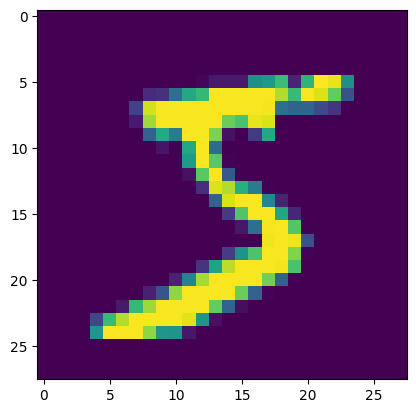

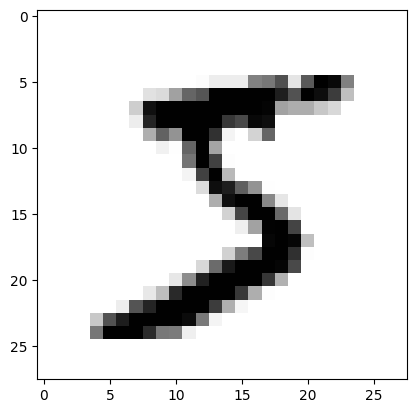

In [5]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

## Checking the values of each pixel

## Before Normalization

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data | Pre-processing Step 

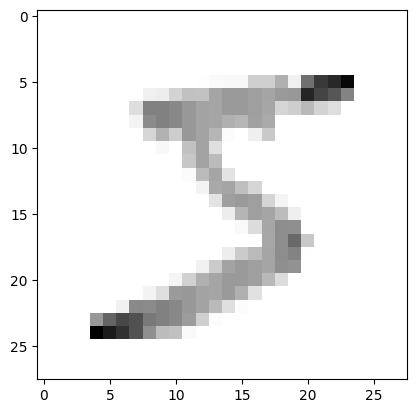

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

## After Normalization

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0])

5


### Resize image to make it suitable for apply Convolution operation

In [10]:
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print('Training Samples Dimension: ', X_trainr.shape)
print('TEsting Smaples Dimension: ', X_testr.shape)

Training Samples Dimension:  (60000, 28, 28, 1)
TEsting Smaples Dimension:  (10000, 28, 28, 1)


## Creating a Deep Neural Network

### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), input_shape = X_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

C:\Users\Dell\Downloads\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print('Total Training Samples: ', len(X_trainr))

Total Training Samples:  60000


In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.fit(X_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7947 - loss: 0.6444 - val_accuracy: 0.9548 - val_loss: 0.1455
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9666 - loss: 0.1087 - val_accuracy: 0.9698 - val_loss: 0.0977
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9777 - loss: 0.0742 - val_accuracy: 0.9777 - val_loss: 0.0783
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9813 - loss: 0.0590 - val_accuracy: 0.9758 - val_loss: 0.0908
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.9820 - val_loss: 0.0648


In [17]:
test_loss, test_acc = model.evaluate(X_testr, y_test)
print('Test Loss on 10,000 test samples',test_loss)
print('Validation Accuracy on 10,000 test samples', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9803 - loss: 0.0640
Test Loss on 10,000 test samples 0.053851984441280365
Validation Accuracy on 10,000 test samples 0.9840999841690063


In [18]:
predictions = model.predict([X_testr])
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[7.7241531e-08 4.5114084e-06 2.4477362e-05 ... 9.9996638e-01
  3.2301094e-07 2.1025046e-06]
 [7.7231438e-05 1.2976744e-07 9.9988770e-01 ... 1.0028671e-06
  1.7229901e-05 6.9589646e-07]
 [2.9877050e-09 9.9999523e-01 1.3057866e-06 ... 5.2806661e-07
  1.6970142e-06 2.8897594e-08]
 ...
 [3.0964767e-10 9.9120746e-07 7.8721900e-09 ... 5.1886541e-08
  2.9965547e-06 1.9486554e-06]
 [4.6607590e-07 3.8232399e-09 8.0298553e-11 ... 4.2401840e-08
  1.5710137e-06 6.1990733e-08]
 [9.8891023e-06 3.7249639e-09 2.4121787e-06 ... 3.3432674e-09
  4.1722774e-06 3.3093457e-08]]


In [19]:
print(np.argmax(predictions[0]))

7


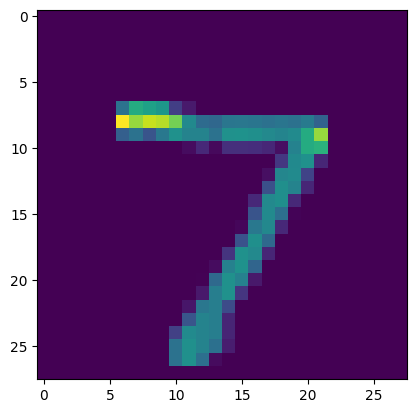

In [20]:
plt.imshow(X_test[0])

In [21]:
print(np.argmax(predictions[45]))

5


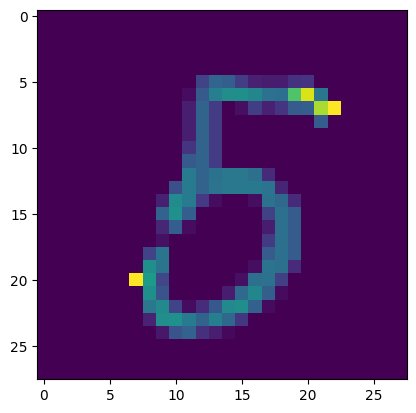

In [22]:
plt.imshow(X_test[45])

In [23]:
print(np.argmax(predictions[128]))

8


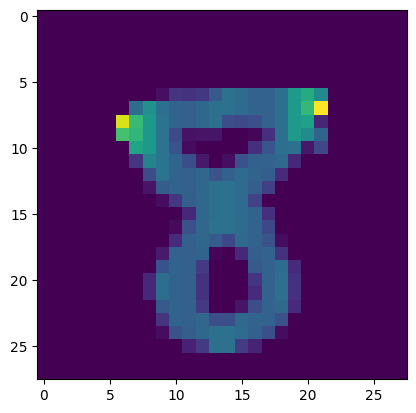

In [24]:
plt.imshow(X_test[128])

In [25]:
!pip install opencv-python

In [26]:
import cv2

In [27]:
img = cv2.imread('seven.png')

In [28]:
img.shape

(442, 338, 3)

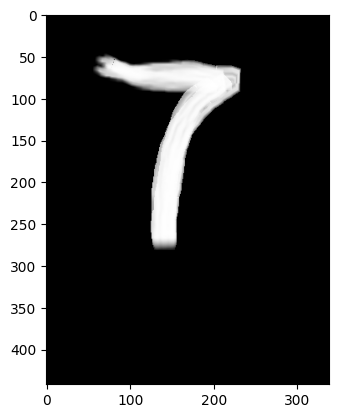

In [29]:
plt.imshow(img)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(442, 338)

In [32]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
newing = tf.keras.utils.normalize(resized, axis = 1)

In [35]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [36]:
newing.shape

(1, 28, 28, 1)

In [37]:
prediction = model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


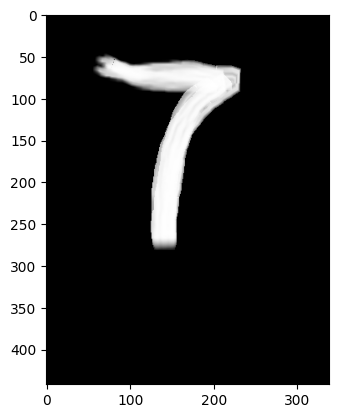

In [38]:
plt.imshow(img)

* ## PROJECT DESCRIPTION:
     
     
     * This project is to recognise the handwritten digits using                  CNN(Convoluted Neural Network).
     * Firstly, MNIST dataset is loaded from **tensorflow** and **keras** .
     * Dataset contains 70,000 samples.
     * In this dataset, 60,000 samples are taken to train the model and            10,000 samples are taken for testing the model.
     * Before training the model, data is needed to be normalized. Hence,          the data is being normalised.
     * After normalized, data was reshaped.
     * For building the model, **Deep Neural Network** is being imported.
     * From Neural networks, layers called **conv2D, MaxPooling2D, Activation, Dense, Flatten** are being activated.
     * After this, data is being trained using this layers.
     * From testing data, some usual numbers ar predicted.
     * Finally by importing **opencv2** own data is imported and predicted.
     * Model's accuracy is: **0.98**